In [44]:
# Importing essential libraries
import pandas as pd
import pickle
import seaborn as sns

# Loading the dataset
df = pd.read_csv('ipl.csv')

In [2]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [42]:
df.isnull().sum()

date              0
venue             0
bat_team          0
bowl_team         0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
total             0
dtype: int64

In [50]:
len(df['venue'].unique())

35

In [4]:
# --- Data Cleaning ---
# Removing unwanted columns
columns_to_remove = ['mid', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [5]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [6]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [7]:
# Keeping only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [9]:
df['venue'].value_counts()

M Chinnaswamy Stadium                                   7443
Feroz Shah Kotla                                        7068
Eden Gardens                                            7049
Wankhede Stadium                                        7048
MA Chidambaram Stadium, Chepauk                         5972
Rajiv Gandhi International Stadium, Uppal               5827
Punjab Cricket Association Stadium, Mohali              4247
Sawai Mansingh Stadium                                  4110
Dr DY Patil Sports Academy                              2088
Subrata Roy Sahara Stadium                              2086
Maharashtra Cricket Association Stadium                 1843
Kingsmead                                               1731
Sardar Patel Stadium, Motera                            1484
Brabourne Stadium                                       1380
SuperSport Park                                         1377
Punjab Cricket Association IS Bindra Stadium, Mohali    1342
Saurashtra Cricket Assoc

### Graphical representation of Num:0f matches played at each venue

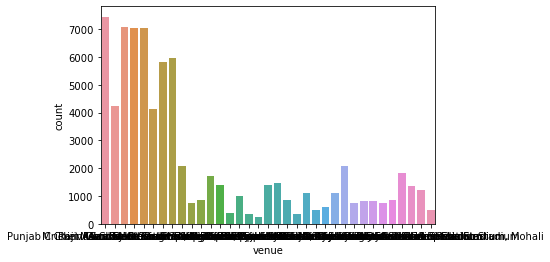

In [49]:
sns.countplot('venue',data=df)

In [8]:
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [10]:
consistent_venue=['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens','Rajiv Gandhi International Stadium, Uppal','MA Chidambaram Stadium, Chepauk',
                 'Sawai Mansingh Stadium','Dr DY Patil Sports Academy','Subrata Roy Sahara Stadium']

In [11]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams)) &(df['venue'].isin(consistent_venue))]

In [12]:
#Removing First 5 overs data in every match. We are doing this bcauz we need atleast 5 overs data to do prediction. so we are removing
# the data before 5 overs bcauz all the data present in before 5 overs will not meet the criteria of having atleast 5 over score.
df = df[df['overs']>=5.0]

In [13]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [16]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [14]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [15]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [17]:
df


,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222
...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107


## DATA PREPOCESSING

In [43]:
df.corr()

,runs,wickets,overs,runs_last_5,wickets_last_5,total
runs,1.000000,0.368223,0.880848,0.573759,0.123120,0.390046
wickets,0.368223,1.000000,0.641998,-0.200018,0.641363,-0.447782
overs,0.880848,0.641998,1.000000,0.275975,0.235275,0.031985
runs_last_5,0.573759,-0.200018,0.275975,1.000000,-0.274827,0.587635
wickets_last_5,0.123120,0.641363,0.235275,-0.274827,1.000000,-0.306343
total,0.390046,-0.447782,0.031985,0.587635,-0.306343,1.000000


####  We can see that wickets in last 5 overs and no:of:wickets are inversly related to  total score.  And runs_scored in last 5 overs palys key role in finding total.

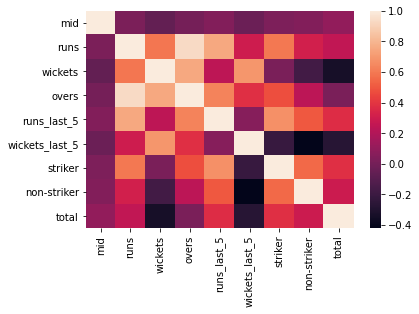

In [45]:
sns.heatmap(df.corr())

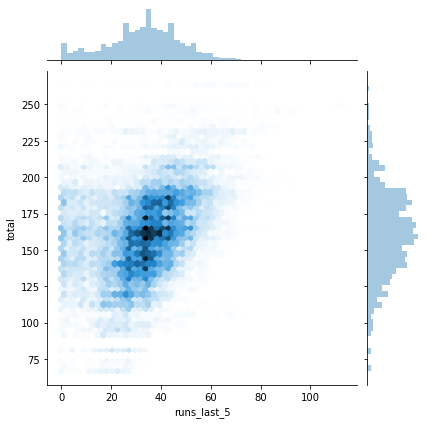

In [46]:
sns.jointplot(x='runs_last_5',y='total',data=df,kind='hex')

####  From above grapg as we can see the runs scored in previous 5 overs from current over is ranging b/w 25-50 . Also we can see that if runs scored in last 5 overs are increasing then total is also increasing. 

### Let's get the average total scored at each venue

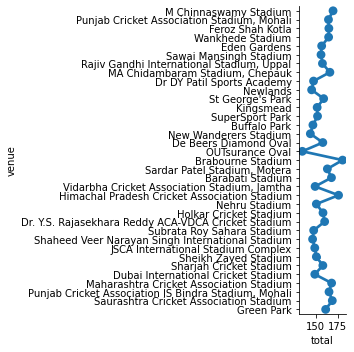

In [47]:
sns.catplot(x='total',y='venue',kind='point',data=df)

### No:OF matches played at each venue

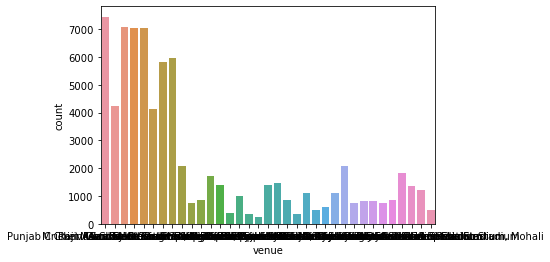

In [48]:
sns.countplot('venue',data=df)

In [18]:
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['venue','bat_team', 'bowl_team'])



In [19]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,venue_Dr DY Patil Sports Academy,venue_Eden Gardens,venue_Feroz Shah Kotla,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'venue_Dr DY Patil Sports Academy', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla', 'venue_M Chinnaswamy Stadium',
       'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sawai Mansingh Stadium', 'venue_Subrata Roy Sahara Stadium',
       'venue_Wankhede Stadium', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers

In [21]:
# Rearranging the columns
encoded_df = encoded_df[['date','venue_Dr DY Patil Sports Academy', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla', 'venue_M Chinnaswamy Stadium',
       'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sawai Mansingh Stadium', 'venue_Subrata Roy Sahara Stadium',
       'venue_Wankhede Stadium', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [22]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

In [23]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [24]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

## Model Building

### Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [26]:
pred = regressor.predict(X_test)

In [27]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 11.285667842741935
MSE: 215.95565049612395
RMSE: 14.69542957848201


## Ridge Regression

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV ### GridSearchCV is a hyperparameter tuning technique.

In [29]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.05994e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.15247e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.06129e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.08114e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.08978e-18): result may not be accurate

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [30]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-354.0831624905774


In [31]:
prediction=ridge_regressor.predict(X_test)

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

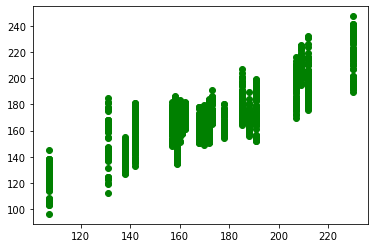

In [33]:
plt.scatter(y_test,prediction,c='green')
plt.show()

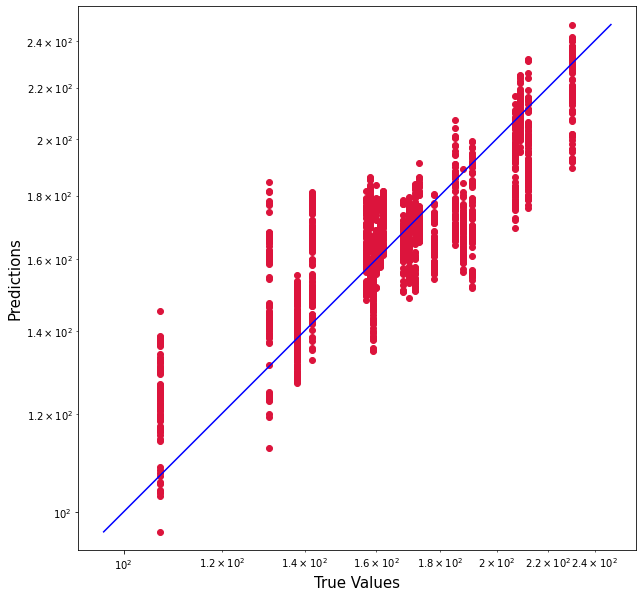

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

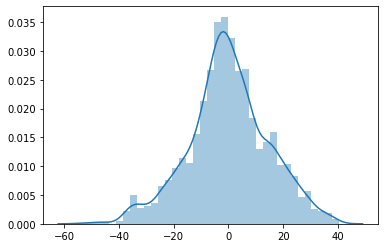

In [35]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [40]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 11.141845146790294
MSE: 204.47951553532565
RMSE: 14.29963340562707


## Lasso Regression

In [36]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV 

In [37]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3067106.933611575, tolerance: 1827.2583129008206
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3148065.2964127064, tolerance: 1893.753653691276
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3434265.7639206215, tolerance: 2039.4149673191646
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

{'alpha': 1}
-343.61053256768184


In [38]:
prediction=lasso_regressor.predict(X_test)

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 11.141845146790294
MSE: 204.47951553532565
RMSE: 14.29963340562707


In [41]:
# Creating a pickle file for the classifier
filename = 'first-innings-score-lr-model1.pkl'
pickle.dump(ridge_regressor, open(filename, 'wb'))